## Example: receptive fields of deep CNNs

Compute the receptive fields of neurons inside CNNs.

Receptive fields $\mathcal R^l = [R_n^l |  n \text{ is a neuron in layer } l]$ are reported as images that have the same size of the input. 

The value of $R^l_n[i, j] \in [0, 1]$ corresponds to how much pixel (i, j), in an input image - i.e. $x[:, i, j]$ - would contribute to the output of neuron $n$, which lives in layer $l$.

In [1]:
import matplotlib.pyplot as plt
import torchvision

from receptivefield import *
from models import *
from utils import *

### VGG receptive fields

In [2]:
## Choose layer ##
l = 10

In [3]:
# Initialize model
net = VGG('VGG11', num_ch=3, num_classes=10, batch_norm=1, pooling='max')
# Chop off the last part of the net
model = vgg_bylayer(net, l)
# Compute receptive field of the remaining part
rf = receptive_field(model)

Replaced MaxPool with AvgPool at layer: 3
Replaced MaxPool with AvgPool at layer: 7


We plot here the receptive fields of neurons at layer 10.

The plot follows the structure of the activation maps, that are 8x8 in this layer - i.e. the top right receptive field correspond to the top right pixel in the activation map and so on...

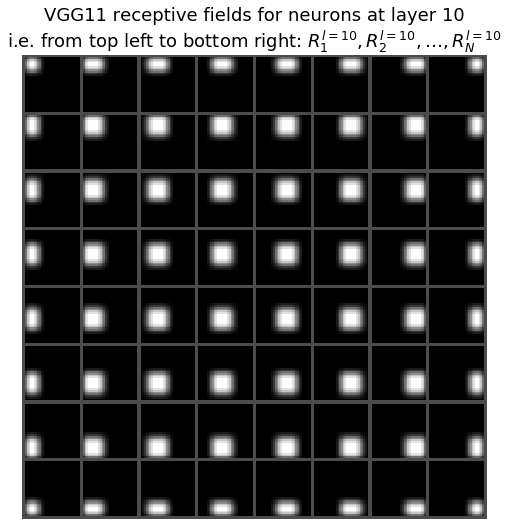

In [4]:
plt.figure(figsize=(7.5, 7.5))
g = torchvision.utils.make_grid(rf[:, None], nrow=8, pad_value=.3)
plt.imshow(g.permute(1, 2, 0))
plt.title('VGG11 receptive fields for neurons at layer 10\ni.e. from top left to bottom right: $R_1^{l=10}, R_2^{l=10}, \dots, R_N^{l=10}$', fontsize=18)
plt.axis('off')
plt.tight_layout(0)

### Same for ResNet18

In [5]:
## Choose layer ##
l = 5

In [6]:
net = ResNet18(num_ch=3, num_classes=10)
model = resnet_bylayer(net, l)
rf = receptive_field(model)

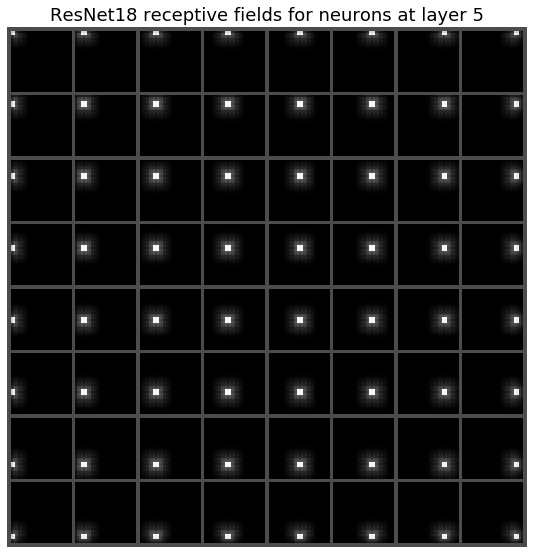

In [7]:
plt.figure(figsize=(7.5, 7.5))
g = torchvision.utils.make_grid(rf[:, None], nrow=8, pad_value=.3)
plt.imshow(g.permute(1, 2, 0))
plt.title(f'ResNet18 receptive fields for neurons at layer {l}', fontsize=18)
plt.axis('off')
plt.tight_layout(0)